In [ ]:
import numpy as np
import pandas as pd 
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima_model import ARIMA
import itertools
#from xgboost import XGBRegressor
#%config InlineBackend.figure_format = 'retina'
#%matplotlib inline

In [ ]:
store_data = pd.read_csv('stores.csv')

In [ ]:
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
feature_data= pd.read_csv('features.csv')

In [ ]:
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
train_data= pd.read_csv('train.csv')

In [ ]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## Pre-Processing 

### First we merge the 3 datasets to visualise the data

In [ ]:
df1= train_data.merge(feature_data, how='inner', on=['Store', 'Date','IsHoliday'])
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [ ]:
df1=df1.merge(store_data, how='inner', on=['Store'])
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


### Converting date variable to date-time object

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day
df1['Week_of_year'] = df1['Date'].dt.isocalendar().week*1.0
df1.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0


In [ ]:
df1['Week_of_year'].head()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: Week_of_year, dtype: Float64

In [ ]:
df1['Week_of_year'].tail()

421565    43.0
421566    43.0
421567    43.0
421568    43.0
421569    43.0
Name: Week_of_year, dtype: Float64

In [ ]:
df1['Date'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: Date, dtype: datetime64[ns]

In [ ]:
df1['Date'].tail()

421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

The day of week on each date is Friday, so the day_of_week analysis is useless. Also, our data is from 5th of February 2010 to 26th of October 2012.

### Checking for missing Values

In [ ]:
df1.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Day                  0
Week_of_year         0
dtype: int64

Except for 'MarkDown' columns, there are no missing values for all other colunms. The MarkDown columns represent Walmart clearance activities, which occurrs in different stores at different time. In this case, it is normal to see many NaN values in these columns.

Weekly sales cannot be less than or equal to zero. So lets look if your data has any such values

In [ ]:
df1[df1['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,19,7.0
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315,2010,3,12,10.0
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315,2010,10,8,40.0
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315,2011,1,21,3.0
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315,2011,3,11,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221,2012,5,25,21.0
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221,2012,6,29,26.0
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221,2012,8,3,31.0
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221,2012,8,31,35.0


1358 rows in 421570 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values.

In [ ]:
df1= df1[df1['Weekly_Sales']>0]

## EDA

In [ ]:
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0


In [ ]:
df1= df1.fillna(0)

In [ ]:
df1.to_csv('csv.csv',encoding='utf-8',index= False)

### ISHoliday vs Weekly sales

Text(0, 0.5, 'Count')

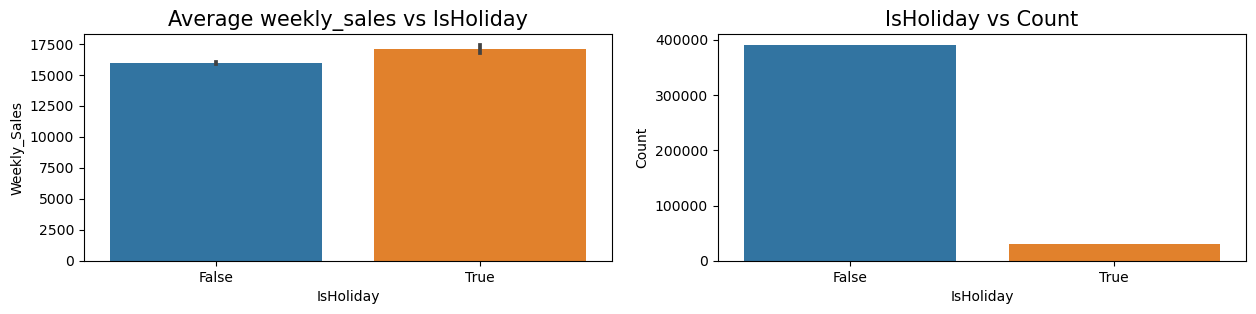

In [ ]:
counts=df1['IsHoliday'].value_counts()
fig, axes = plt.subplots(1,2, figsize=(15,3), dpi=100)

plt_1= sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df1,ax=axes[0])
plt_1.set_title('Average weekly_sales vs IsHoliday', fontsize=15)

plt_2= sns.barplot(x=df1['IsHoliday'].unique(), y=df1['IsHoliday'].value_counts(),ax=axes[1])
plt_2.set_title('IsHoliday vs Count',fontsize=15)
plt_2.set_xlabel('IsHoliday')
plt_2.set_ylabel('Count')

It can be clearly seen that the average sales per week is much higher for holiday weeks altough holidays accounts for very less portion of our data.

### Holiday Dates

In [ ]:
df1[df1['IsHoliday']==True]['Date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12

Thanksgiving: 26-Nov-10, 25-Nov-11

Christmas: 31-Dec-10, 30-Dec-11



### Store type popularity

In [ ]:
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0


Text(0.5, 1.0, 'Store type popularities')

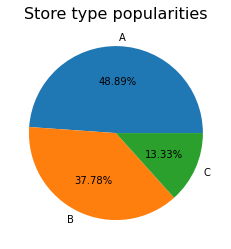

In [ ]:
plt.pie(store_data['Type'].value_counts(normalize=True)*100, labels = df1['Type'].unique(), autopct='%.2f%%')
plt.title('Store type popularities', fontsize=16)

Store Type A consists of the majority of all stores

### Relationship between store type and store size 

In [ ]:
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Text(0.5, 1.0, 'Store size vs Store Type')

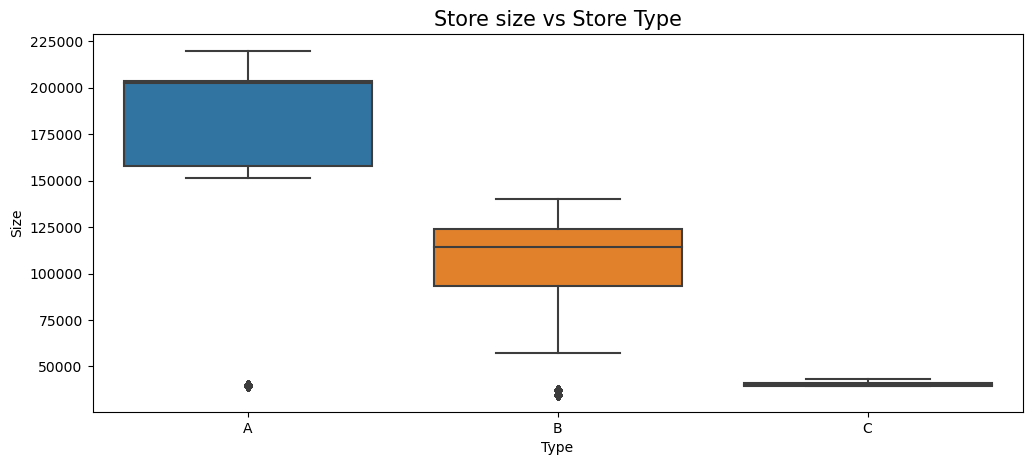

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
sns.boxplot(x=df1['Type'],y=df1['Size'])
plt.title('Store size vs Store Type', fontsize=15)

### Relationship between store type and average weekly sales 

(0.0, 100000.0)

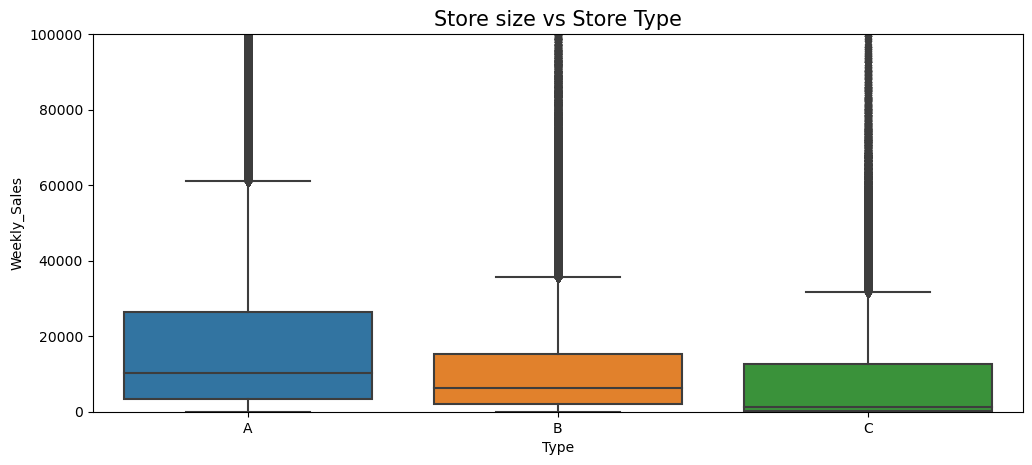

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
sns.boxplot(x=df1['Type'],y=df1['Weekly_Sales'])
plt.title('Store size vs Store Type', fontsize=15)
plt.ylim(0,100000)

From the above two boxplots we can infer that store-type A has on-average the highest size and sales followed by B and C

### Weekly sales vs Store type

Text(0.5, 1.0, 'Average weekly sales of store types')

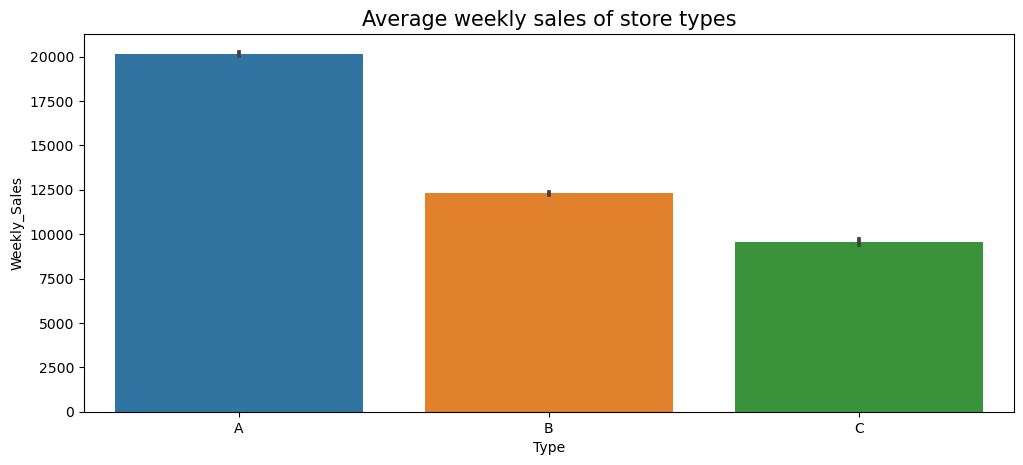

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
sns.barplot(x='Type', y='Weekly_Sales', data=df1)
plt.title('Average weekly sales of store types', fontsize=15)

Also, Store A has the highest average weekly sales


### Weekly sales by stores

Text(0.5, 1.0, 'Weely Sales By Store')

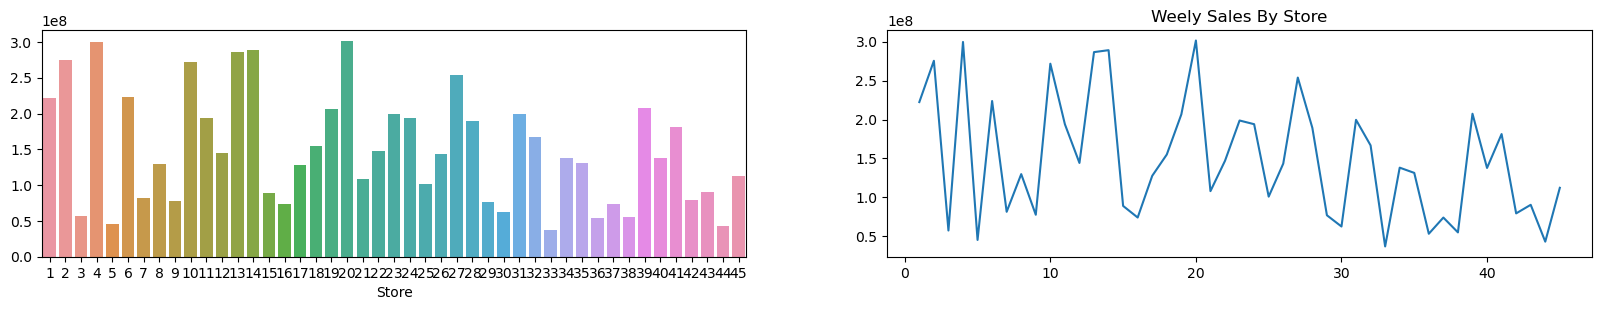

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,3), dpi=100)
plt.title('Weely Sales By Store')
store_avg = df1.groupby(by='Store')['Weekly_Sales'].sum()
plt.plot(store_avg.index,store_avg.values)

sns.barplot(x= store_avg.index, y=store_avg.values,ax = axes[0])
plt.title('Weely Sales By Store')

On average store 20 has the highest sales value followed by 4 and 14

### Sales by weeks for each year

In [ ]:
sales_2010 = df1[df1['Year']==2010].groupby(by='Week_of_year').sum()
sales_2011 = df1[df1['Year']==2011].groupby(by='Week_of_year').sum()
sales_2012 = df1[df1['Year']==2012].groupby(by='Week_of_year').sum()

Text(0, 0.5, 'Average sales')

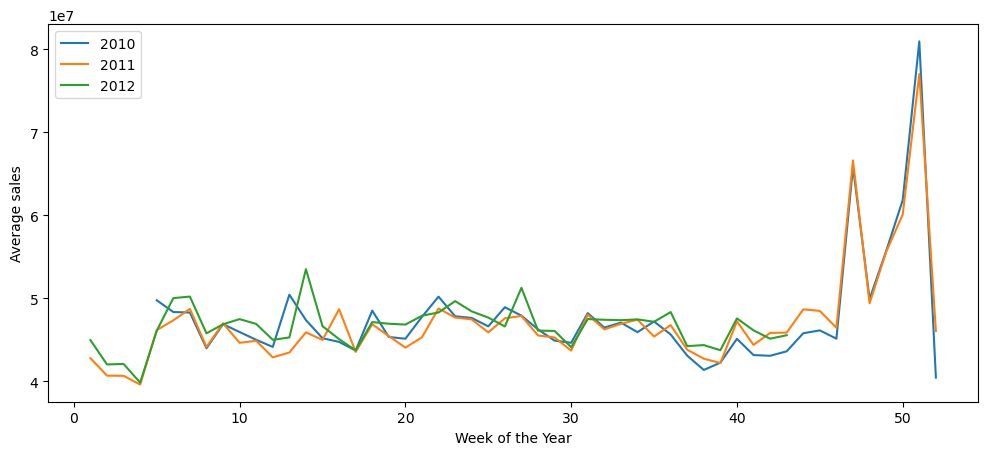

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(sales_2010.index,sales_2010['Weekly_Sales'],label='2010')
plt.plot(sales_2011.index,sales_2011['Weekly_Sales'],label='2011')
plt.plot(sales_2012.index,sales_2012['Weekly_Sales'],label='2012')
plt.legend()
plt.xlabel('Week of the Year')
plt.ylabel('Average sales')


The averge sales trend is similar for each year. We can see that the week which had a holiday in it has higher sales in that particular region. For the Holiday Weeks i.e 5,35,46,51 we can see a sudden spike in the graph.

### Sales by months for each year

In [ ]:
m_sales_2010 = df1[df1['Year']==2010].groupby(by='Month').sum()
m_sales_2011 = df1[df1['Year']==2011].groupby(by='Month').sum()
m_sales_2012 = df1[df1['Year']==2012].groupby(by='Month').sum()


Text(0, 0.5, 'Average sales')

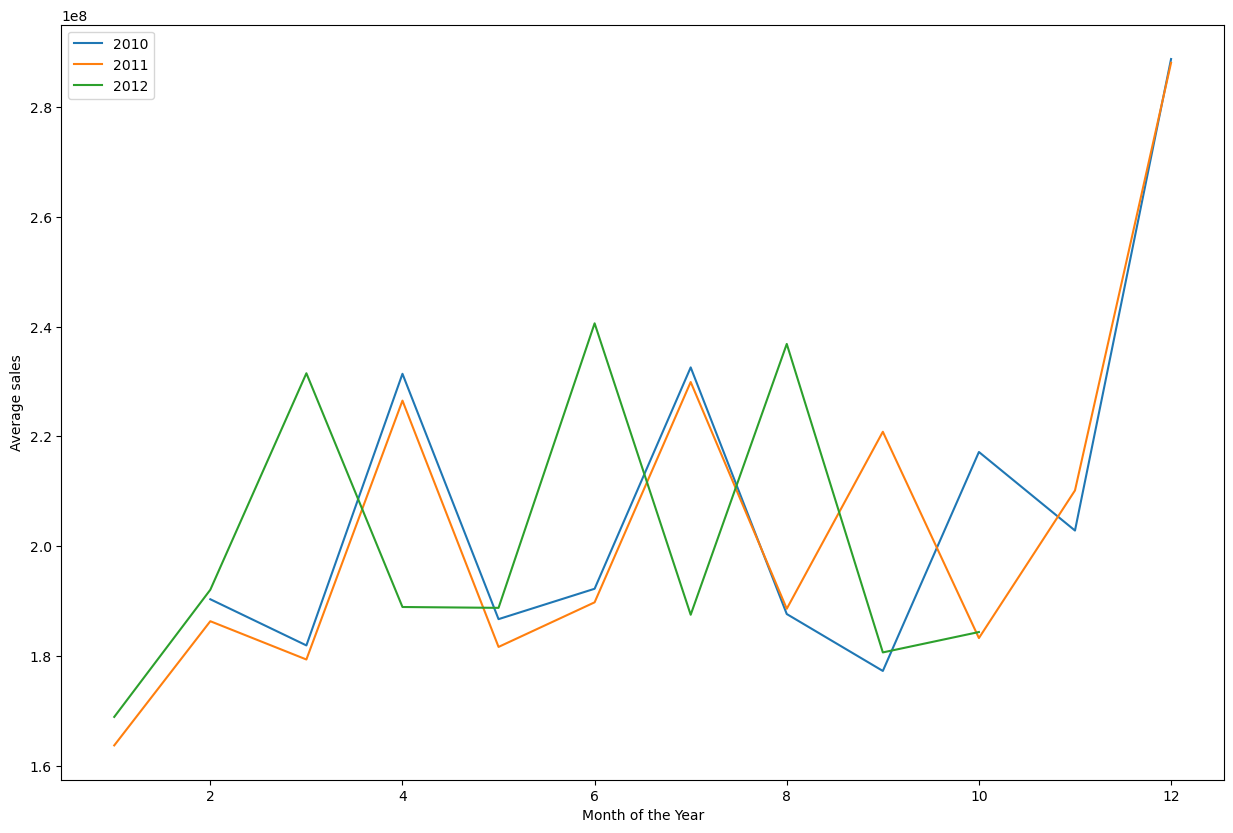

In [ ]:
plt.figure(figsize=(15,10), dpi=100)
plt.plot(m_sales_2010.index,m_sales_2010['Weekly_Sales'],label='2010')
plt.plot(m_sales_2011.index,m_sales_2011['Weekly_Sales'],label='2011')
plt.plot(m_sales_2012.index,m_sales_2012['Weekly_Sales'],label='2012')
plt.legend()
plt.xlabel('Month of the Year')
plt.ylabel('Average sales')

Since our data contains Holidays on weekly basis, the Sales by Months graph does not provide much information as the Sales by weeks graph. However we can see that the highest sales is seen at the end of each year

In [ ]:
x= df1[df1['Year']==2010]
x.loc[(x['Dept']==1) & (x['Store']==1)].sort_values(by = 'Week_of_year')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0
73,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,12,6.0
145,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,19,7.0
218,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,26,8.0
290,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,5,9.0
363,1,1,2010-03-12,21043.39,False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,A,151315,2010,3,12,10.0
436,1,1,2010-03-19,22136.64,False,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,A,151315,2010,3,19,11.0
508,1,1,2010-03-26,26229.21,False,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,A,151315,2010,3,26,12.0
580,1,1,2010-04-02,57258.43,False,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,A,151315,2010,4,2,13.0
652,1,1,2010-04-09,42960.91,False,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,A,151315,2010,4,9,14.0


# Machine Learning Models

The first step would be to check the correlation between our variables using heatmap

Changing the Type variable from string to numeric to check the correlation with other variables

In [ ]:
df1['Type']= df1['Type'].replace(['A','B','C'],[1,2,3])

<AxesSubplot:>

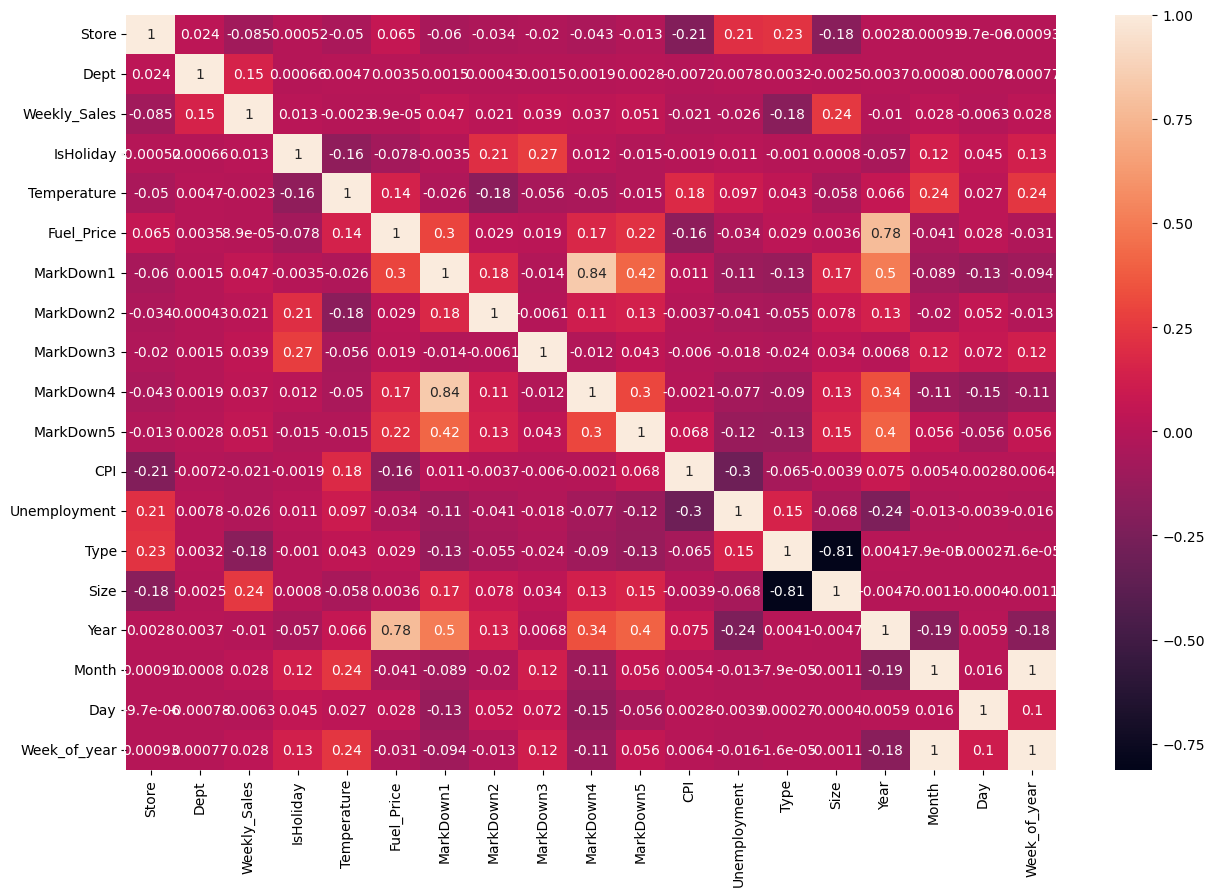

In [ ]:
plt.figure(figsize=(15,10), dpi=100)
sns.heatmap(df1.corr(),annot=True)

The Tempeature, Fuel price, CPI, Unemployment have very low correlation with Weekly sales so can be removed. Also the month, day columns can also be dropped because of high correlation with week. Also, Markdown 4 and 5 highly correlated with Markdown 1 and can be dropped as well.

In [ ]:
columns=['Temperature', 'Fuel_Price', 'MarkDown4', 'MarkDown5',
                'CPI', 'Unemployment', 'Date', 'Month', 'Day']

In [ ]:
df_train = df1.drop(columns= columns)

In [ ]:
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,Type,Size,Year,Week_of_year
0,1,1,24924.50,False,0.0,0.0,0.0,1,151315,2010,5.0
1,1,2,50605.27,False,0.0,0.0,0.0,1,151315,2010,5.0
2,1,3,13740.12,False,0.0,0.0,0.0,1,151315,2010,5.0
3,1,4,39954.04,False,0.0,0.0,0.0,1,151315,2010,5.0
4,1,5,32229.38,False,0.0,0.0,0.0,1,151315,2010,5.0


Filling all NA values in Markdown variable with 0

In [ ]:
df_train = df_train.fillna(0)

In [ ]:
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,Type,Size,Year,Week_of_year
0,1,1,24924.50,False,0.0,0.0,0.0,1,151315,2010,5.0
1,1,2,50605.27,False,0.0,0.0,0.0,1,151315,2010,5.0
2,1,3,13740.12,False,0.0,0.0,0.0,1,151315,2010,5.0
3,1,4,39954.04,False,0.0,0.0,0.0,1,151315,2010,5.0
4,1,5,32229.38,False,0.0,0.0,0.0,1,151315,2010,5.0


In [ ]:
#df_train['IsHoliday'].value_counts()

In [ ]:
df_train["IsHoliday"] = df_train["IsHoliday"].astype(int)
df_train

,Store,Dept,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,Type,Size,Year,Week_of_year
0,1,1,24924.50,0,0.00,0.00,0.0,1,151315,2010,5.0
1,1,2,50605.27,0,0.00,0.00,0.0,1,151315,2010,5.0
2,1,3,13740.12,0,0.00,0.00,0.0,1,151315,2010,5.0
3,1,4,39954.04,0,0.00,0.00,0.0,1,151315,2010,5.0
4,1,5,32229.38,0,0.00,0.00,0.0,1,151315,2010,5.0
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,4018.91,58.08,100.0,2,118221,2012,43.0
421566,45,94,5203.31,0,4018.91,58.08,100.0,2,118221,2012,43.0
421567,45,95,56017.47,0,4018.91,58.08,100.0,2,118221,2012,43.0
421568,45,97,6817.48,0,4018.91,58.08,100.0,2,118221,2012,43.0


### Train-Test Split

The range among the variables varies a lot so we scale the data

In [ ]:
X = df_train.drop(columns=['Weekly_Sales'])
Y = df_train['Weekly_Sales']

In [ ]:
scaler= MinMaxScaler()

In [ ]:
X[X.columns] = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=432)


###  Error Metric

This competition is evaluated on the weighted mean absolute error (WMAE). We define this error using this function

In [ ]:
def WMAE(data, prediction, actual):
    weights = data['IsHoliday'].apply(lambda x: 5 if x==1 else 1)
    return np.round(np.sum(weights*abs(prediction-actual))/weights.sum(), 2)

# Random Forest Regressor

We start with random values for the parameters

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=432, n_jobs=-1, max_depth=35,
                           max_features = 'auto',min_samples_split = 5).fit(X_train, y_train)

Weighted mean absolute error (WMAE) on train data

In [ ]:
train_wmae = WMAE(X_train, rf_model.predict(X_train), y_train)
train_wmae

858.85

Weighted mean absolute error (WMAE) on test data

In [ ]:
test_wmae = WMAE(X_test, rf_model.predict(X_test), y_test)
test_wmae

1657.81

R2 score on train data

In [ ]:
r2_score(y_train,rf_model.predict(X_train))

0.9924780387059335

R2 score on test data

In [ ]:
r2_score(y_test,rf_model.predict(X_test))

0.9704256294260178

Feature Importance

Text(0.5, 1.0, 'Feature Importance')

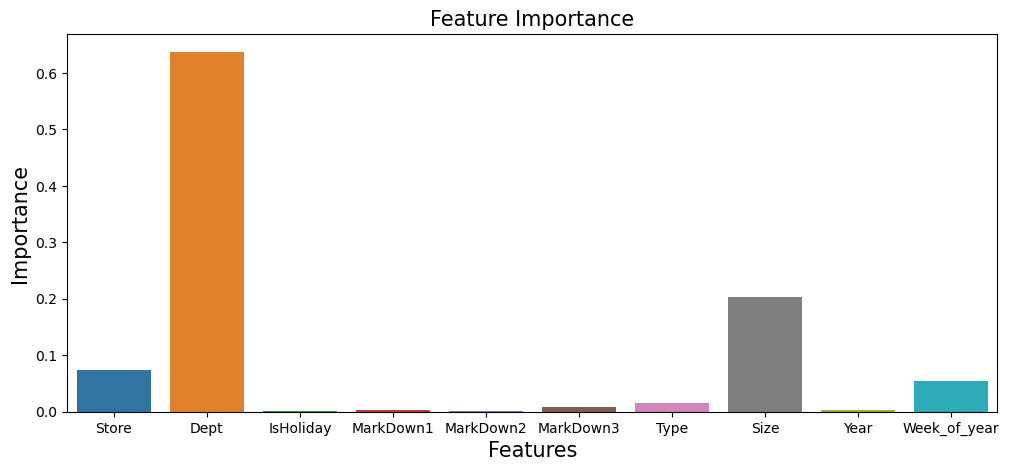

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
sns.barplot(x= X_train.columns, y = rf_model.feature_importances_)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Importance',fontsize=15)
plt.title('Feature Importance',fontsize=15)

Lets try to drop a few features and re-run the above model to check if it reduces the error

In [ ]:
X_train2 = X_train.drop(columns=['MarkDown1', 'MarkDown2', 'Year'])
X_test2 = X_test.drop(columns=['MarkDown1', 'MarkDown2', 'Year'])

In [ ]:
rf_model2 = RandomForestRegressor(n_estimators=50, random_state=432, n_jobs=-1, max_depth=50,
                           max_features = 'auto',min_samples_split = 2).fit(X_train2, y_train)

In [ ]:
test_wmae2 = WMAE(X_test2, rf_model2.predict(X_test2), y_test)
test_wmae2

1841.44

Dropping columns increases the WMAE error. This means our model is actually learning for these features. So we go forward with the previous model

Hyperparameter tuning for Random Forest Regressor

Parameters choosen for tuning are 'n_estimators',  'max_depth',  'min_samples_split', 'min_samples_leaf',     'max_features', 'max_samples'.

In [ ]:
#funtion to fit the random forest model for the given parameters 

def par_wmae(**par):
    rf_model3= RandomForestRegressor(random_state=432, n_jobs=-1, **par).fit(X_train, y_train)
    train_wmae2 = WMAE(X_train, rf_model3.predict(X_train), y_train)
    test_wmae2 =  WMAE(X_test, rf_model3.predict(X_test), y_test)
    return(train_wmae2, test_wmae2)
    


In [ ]:
def plt_par(par_name, par_value):
    train_err, test_err = [], [] 
    for value in par_value:
        par= {par_name: value}
        x,y = par_wmae(**par)
        train_err.append(x)
        test_err.append(y)
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(par_value, train_err)
    plt.plot(par_value, test_err)
    plt.xlabel(par_name,fontsize=15)
    plt.ylabel('WMAE',fontsize=15)
    plt.legend(['Training', 'Validation'])

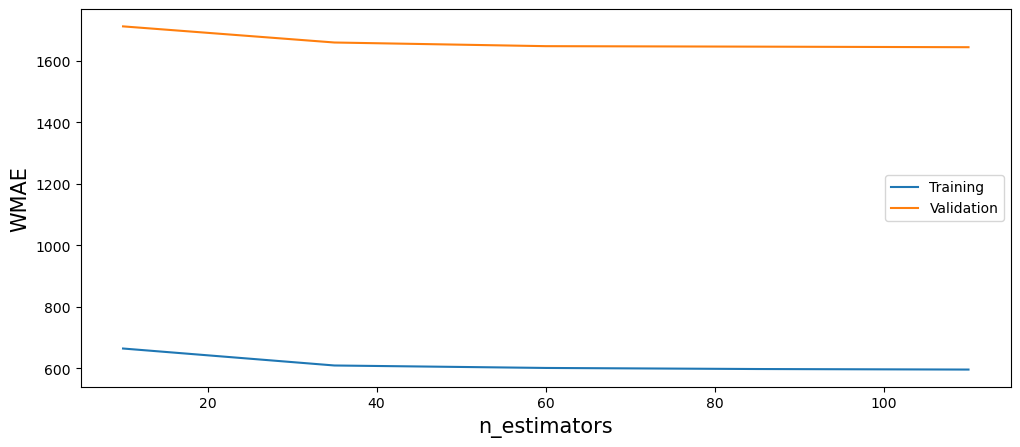

In [ ]:
plt_par('n_estimators',np.arange(10,125,25))

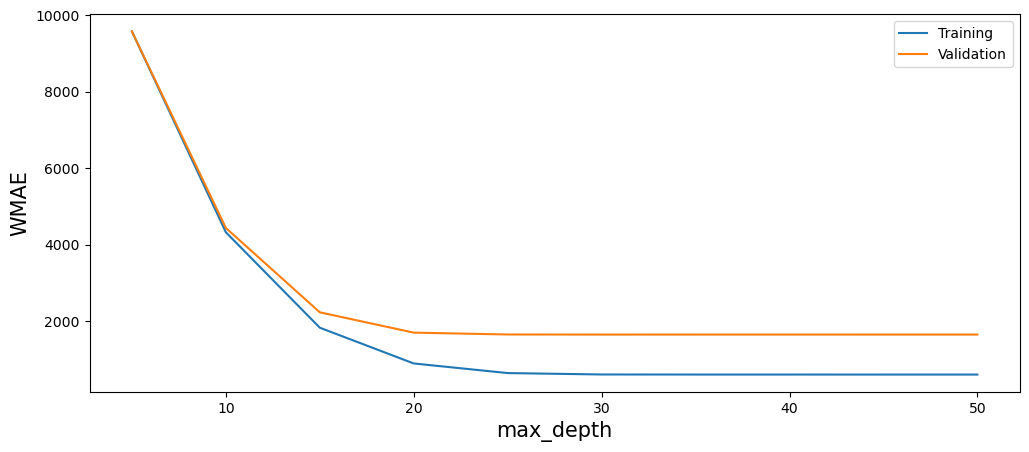

In [ ]:
plt_par('max_depth', np.arange(5,51,5))

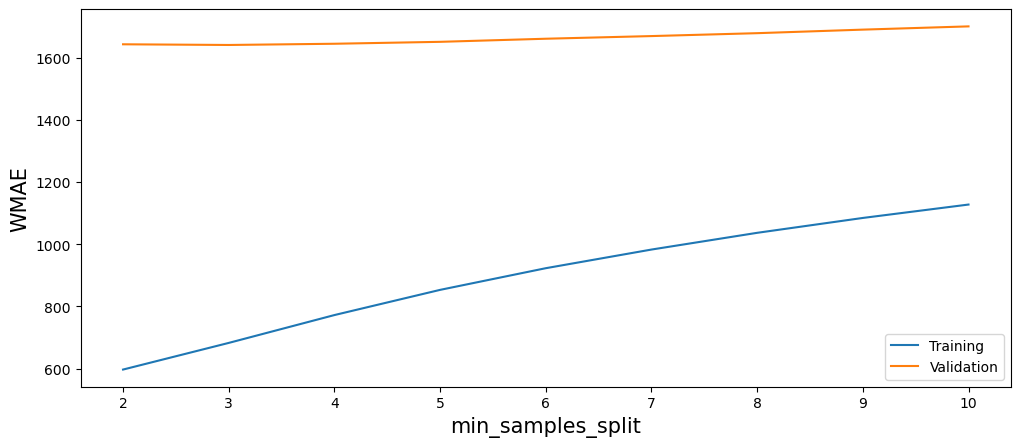

In [ ]:
plt_par('min_samples_split', np.arange(2,11,1))

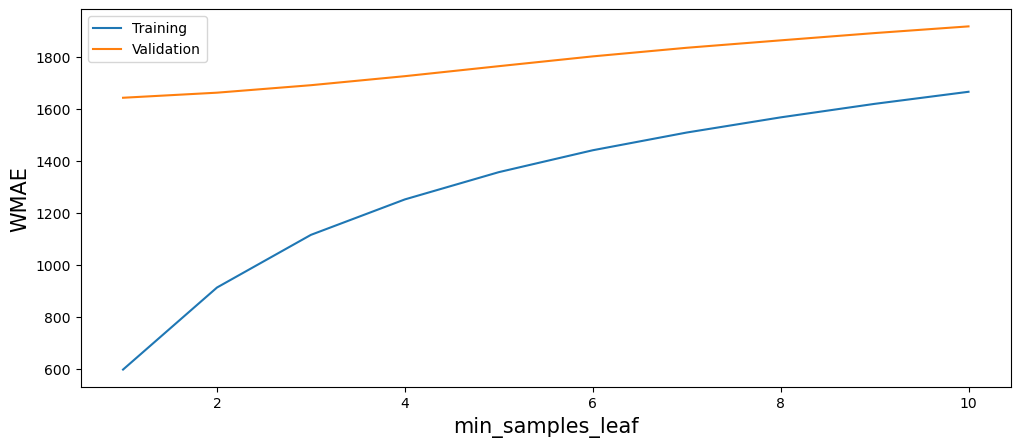

In [ ]:
plt_par('min_samples_leaf', np.arange(1,11,1))

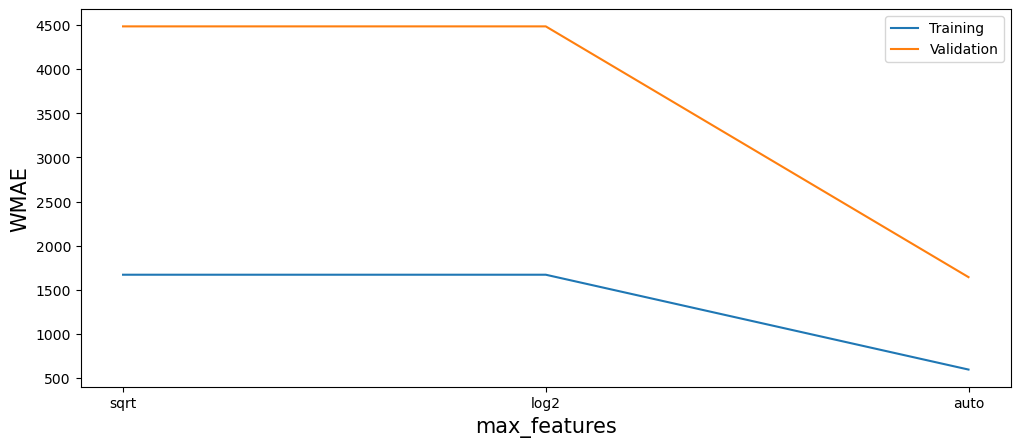

In [ ]:
plt_par('max_features', ['sqrt', 'log2','auto'])

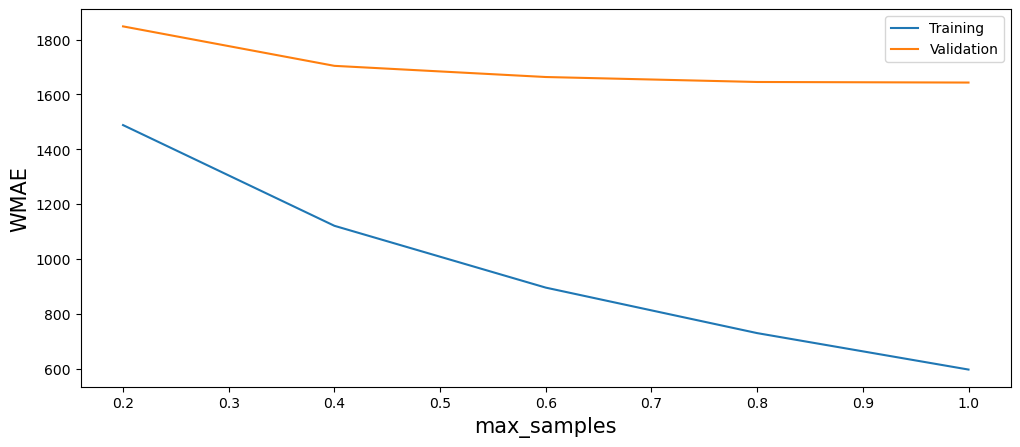

In [ ]:
plt_par('max_samples', np.arange(0.2,1.1,0.2))

The following parameters are chosen:

n_estimators: 100

max_depth: 50

min_samples_split: 2

min_samples_leaf: 1

max_features: 'auto'

max_samples: 0.9






In [ ]:
rf_model4= RandomForestRegressor(random_state=432, n_jobs=-1, max_depth=50, n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_samples=0.9, max_features='auto').fit(X_train, y_train)





In [ ]:
train_wmae4 = WMAE(X_train, rf_model4.predict(X_train), y_train)
train_wmae4

658.44

In [ ]:
test_wmae4 = WMAE(X_test, rf_model4.predict(X_test), y_test)
test_wmae4

1642.51

Therefore, we get a  WMAE error of 1642.51. for the random forest regressor

## XG Boost Regressor

In [ ]:
from xgboost import XGBRegressor

#Starting with default parameters of the model
gbm = XGBRegressor(random_state = 432, n_jobs = -1)

#Fitting the model
gbm.fit(X_train, y_train)

gbm_train_prediction = gbm.predict(X_train)

#WMAE on training data
gbm_train_wmae = WMAE(X_train, y_train, gbm_train_prediction)

print('The WMAE loss for the training data is  {}.'.format(gbm_train_wmae))

gbm_test_preds = gbm.predict(X_test)

#WMAE on test data
gbm_test_wmae = WMAE(X_test, y_test, gbm_test_preds)

print('The WMAE loss for the testing data is  {}.'.format(gbm_test_wmae))

The WMAE loss for the training data is  3031.18.
The WMAE loss for the testing data is  3171.92.


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

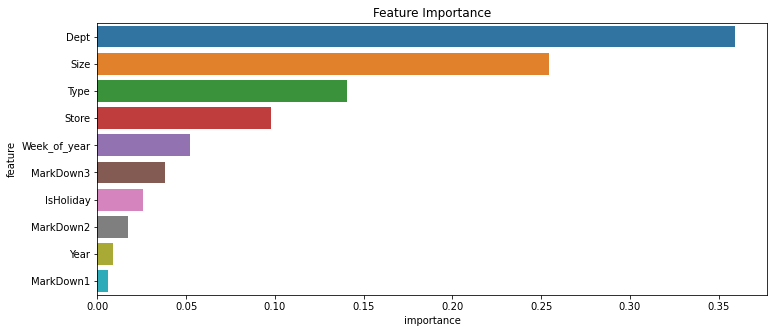

In [ ]:
important_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gbm.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12,5))
plt.title('Feature Importance')
sns.barplot(data=important_df, x='importance', y='feature')

For GBM, Department, Size and Type are three important features

Now, dropping three least important features to check if WMAE reduces:

In [ ]:
X_train_fe = X_train.drop(columns=['MarkDown2','Year', 'MarkDown2'])
X_test_fe = X_test.drop(columns=['MarkDown2','Year', 'MarkDown2'])

In [ ]:
gbm_fe = XGBRegressor(random_state = 432, n_jobs = -1).fit(X_train_fe, y_train)

In [ ]:
test_wmae_fe = WMAE(X_test_fe, gbm_fe.predict(X_test_fe), y_test)
test_wmae_fe

3175.65

Dropping few features increases the WMAE error, so we continue with the previous model

In [ ]:
# Tuning of Model Parameters
def xgb_test_params(**params):  
    model = XGBRegressor(random_state=432, n_jobs=-1, **params).fit(X_train, y_train)
    train_wmae = WMAE(X_train, y_train, model.predict(X_train))
    test_wmae = WMAE(X_test, y_test, model.predict(X_test))
    return train_wmae, test_wmae

In [ ]:
def test_param_plot_xgb(param_name, param_values):
    train_errors, test_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = xgb_test_params(**params)
        train_errors.append(train_wmae)
        test_errors.append(val_wmae)
    plt.figure(figsize=(12,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, test_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Testing'])

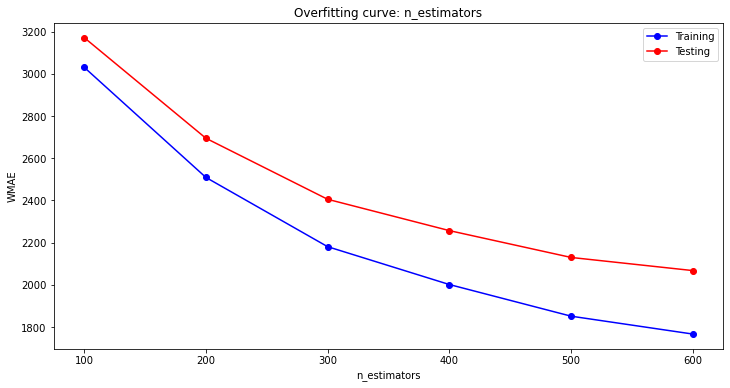

In [ ]:
test_param_plot_xgb('n_estimators', [100, 200, 300, 400, 500, 600])

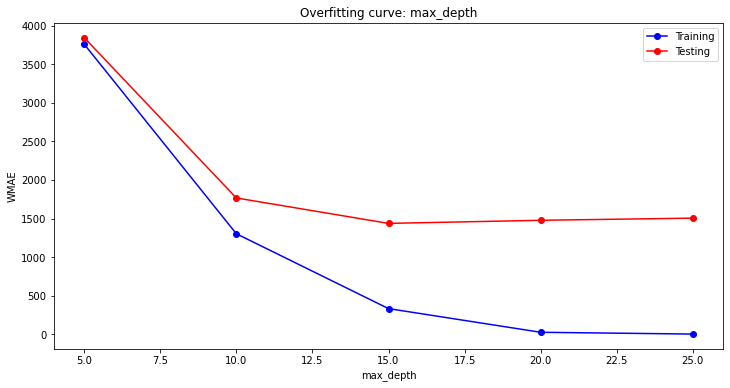

In [ ]:
test_param_plot_xgb('max_depth', [5, 10, 15, 20, 25])

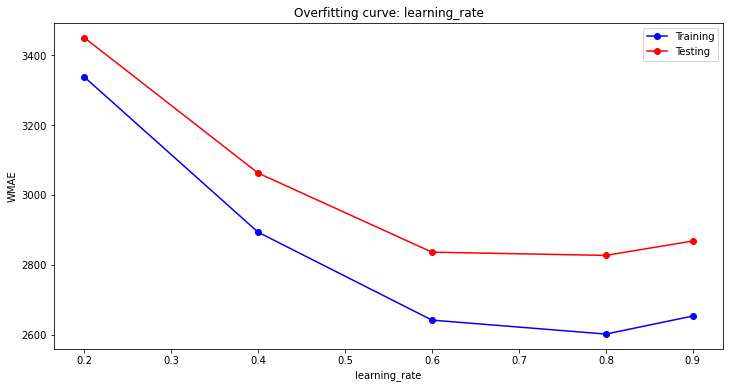

In [ ]:
test_param_plot_xgb('learning_rate', [0.2, 0.4, 0.6, 0.8, 0.9])

From the above testing of parameters, the best parameters which minimizes the error are found to be n_estimators = 600, max_depth = 20, learning_rate = 0.8.
These parameters are varied individually but now, it should be varied simultaneously for further tuning of the model by the best combination of the values which minimizes the error.
With trial and error method, best combination of the values were found to be n_estimators = 400, max_depth = 15, learning_rate = 0.35.

In [ ]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(random_state=432, n_jobs=-1, n_estimators=400, max_depth=15, learning_rate=0.35)

# Fit the model
gbm.fit(X_train, y_train)

gbm_train_preds = gbm.predict(X_train)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(X_train, y_train, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_test_preds = gbm.predict(X_test)

# Compute WMAE on testing data
gbm_test_wmae = WMAE(X_test, y_test, gbm_test_preds)
print('The WMAE loss for the testing set is  {}.'.format(gbm_test_wmae))

The WMAE loss for the training set is  39.25.
The WMAE loss for the testing set is  1456.36.


Therefore, we get a  WMAE error of 1456.36 for the XG Boost regressor

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Create and train the model
model_ridge = Ridge().fit(X_train, y_train)

# Generate predictions on training data
train_preds = model_ridge.predict(X_train)

# Compute WMAE on traing data
train_wmae = WMAE(X_train, y_train, train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))

# Generate predictions on testing data
test_preds = model_ridge.predict(X_test)

# Compute WMAE on testing data
test_wmae = WMAE(X_test, y_test, test_preds)
print('The WMAE loss for the testing set is  {}.'.format(test_wmae))

The WMAE loss for the training set is  14785.88.
The WMAE loss for the testing set is  14829.79.


We get a very high WMAE error

# Time Series Analysis

The general process we will follow for Time Series Modelling is the following:

1. Visualize the Time Series Data- Plot the series to check for outliers
2. Apply Statistical tests to check if the series is stationary i.e. check if it has trend and seasonality.
3. If non-stationary, make it stationary
4. Chose the best parameters for fitting the model
5. Construct the SARIMA model based on the data
6. Use the model to make predictions
7. Check the error and chose the best model


## Visualize the Time Series Data

In [ ]:
df_ts = df1.copy()

In [ ]:
df_ts.set_index('Date',inplace=True)

In [ ]:
df_ts.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
2010-02-05,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
2010-02-05,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
2010-02-05,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
2010-02-05,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0


In [ ]:
df_ts= df_ts.resample('W').mean()
df_ts['Weekly_Sales'].head()

Date
2010-02-07    16836.121997
2010-02-14    16352.056032
2010-02-21    16216.658979
2010-02-28    14899.549688
2010-03-07    15921.015727
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

In [ ]:
pd.DataFrame({'Weekly_Sales': df_ts['Weekly_Sales']})

,Weekly_Sales
Date,
2010-02-07,16836.121997
2010-02-14,16352.056032
2010-02-21,16216.658979
2010-02-28,14899.549688
2010-03-07,15921.015727
...,...
2012-09-30,14765.327279
2012-10-07,15983.413747
2012-10-14,15427.596739


Text(0, 0.5, 'Weekly Sales')

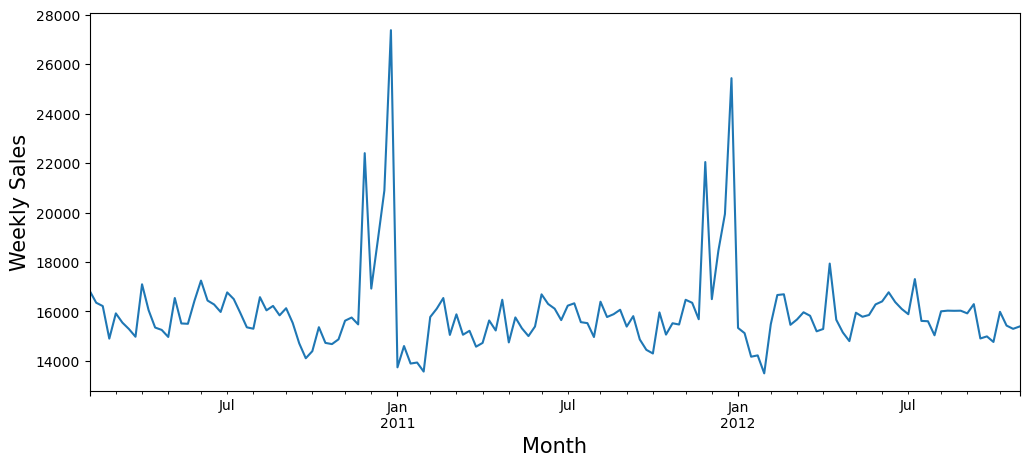

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
df_ts['Weekly_Sales'].plot()
plt.xlabel('Month',fontsize=15)
plt.ylabel('Weekly Sales',fontsize=15)

We can see that mean and variance is nearly constant throughout the data. However, there is some sort of seasonality assosicated with the weekly sales i.e in the months of Nov and Dec the sales are very high due to holidays like Christmas and Thanksgiving. This clearly tells its a timeseries problem and it will be interesting to look more into it.

### Decomposing the Time-Series to See Components like Trend, Seasonality, Noise

Now we will check the trend and seasonal components in our time series data 

<Figure size 432x288 with 0 Axes>

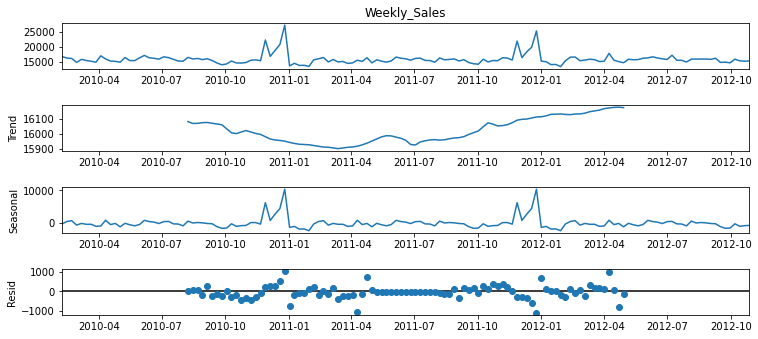

In [ ]:
decomposition = seasonal_decompose(df_ts['Weekly_Sales'], period=52)  
residual= decomposition.resid
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 5)
plt.show()

We can see that there is no significant trend in our data but there is an annual seasonality. Lets confirm this with some statistical tests 

### Checking if the data is Non-Stationary by determining the rolling statistics and performing the Dickey-Fuller test

In [ ]:
def stationarity(tmseries):
    #determining the rolling statistics
    rolmean=tmseries.rolling(window=4).mean()
    rolstd=tmseries.rolling(window=4).std()
    
    plt.figure(figsize=(12,5), dpi=100)
    actual=plt.plot(tmseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylim(-2000,10000)
    plt.show(block=False)
    
    #performing the Dickey-Fuller Test
    print('Dickey-Fuller Test: ')
    dftest=adfuller(tmseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

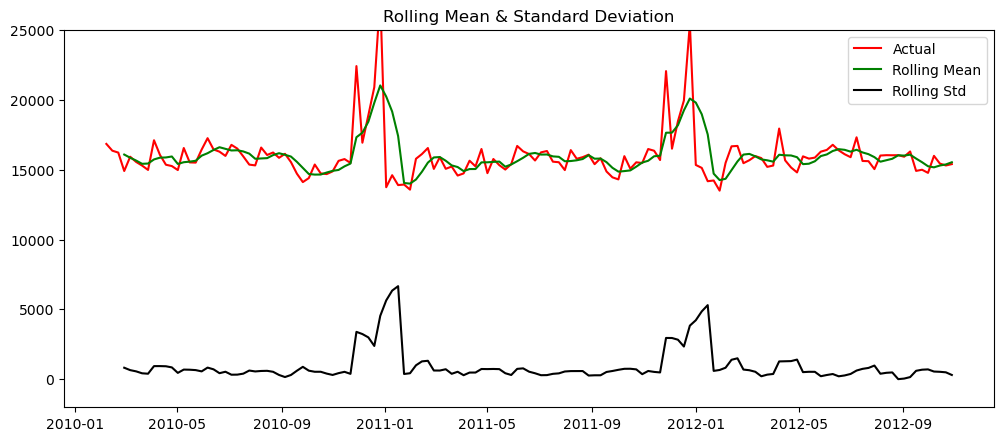

Dickey-Fuller Test: 
Test Statistic         -5.930803e+00
p-value                 2.383227e-07
Lags Used               4.000000e+00
No. of Obs              1.380000e+02
Critical Value (1%)    -3.478648e+00
Critical Value (5%)    -2.882722e+00
Critical Value (10%)   -2.578065e+00
dtype: float64


In [ ]:
stationarity(df_ts['Weekly_Sales'])

We can see that the mean and variance are approximately consistent over the weeks. Also, this is confirmed by the Dickey-Fuller test where, we get p-value less than 0.05. Hence, we can reject the null hypothesis and conclude that the data is stationary. 

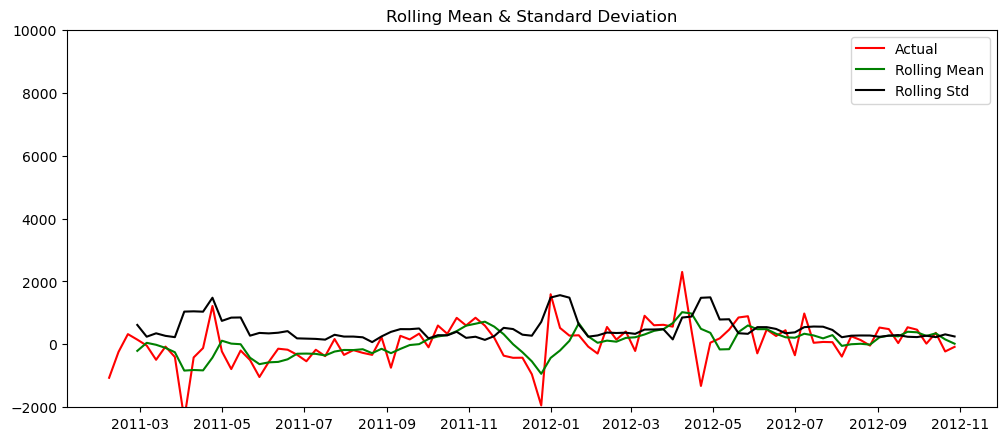

Dickey-Fuller Test: 
Test Statistic         -7.398813e+00
p-value                 7.651130e-11
Lags Used               0.000000e+00
No. of Obs              9.000000e+01
Critical Value (1%)    -3.505190e+00
Critical Value (5%)    -2.894232e+00
Critical Value (10%)   -2.584210e+00
dtype: float64


In [ ]:
df_s = pd.DataFrame({'Weekly_Sales': df_ts['Weekly_Sales'] - df_ts['Weekly_Sales'].shift(52)})
df_s['IsHoliday']= df_ts['IsHoliday']
df_s = df_s.dropna()
stationarity(df_s['Weekly_Sales'])

## Time Series Models

In [ ]:
ts_train = df_ts[:int(0.5*(len(df_ts)))]
ts_test =  df_ts[int(0.5*(len(df_ts))):]


Since our data has an annual seasonal component we use SARIMA, which is an extension to ARIMA that supports the direct modeling of the seasonal component of the series

### SARIMA Model

The parameters for SARIMA model are as follows:

p and seasonal P: indicate the number of AR terms (lags of the stationary series)

d and seasonal D: indicate differencing that must be done to stationary series

q and seasonal Q: indicate the number of MA terms (lags of the forecast errors)

lag: indicates the seasonal length in the data

### Selecting the Modelling Parameters 

### ACF and PACF Plots

ACF stands for Auto Correlation Function and PACF stands for Partial Auto Correlation Function.

We plot these graphs to get a rough estimation of our parameters and then perform a grid search by taking these estimations to get the exact value based on the AIC scores

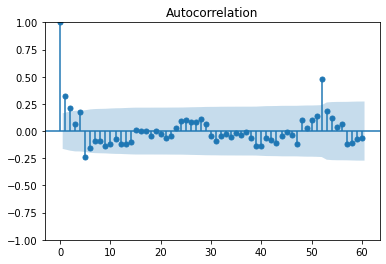

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


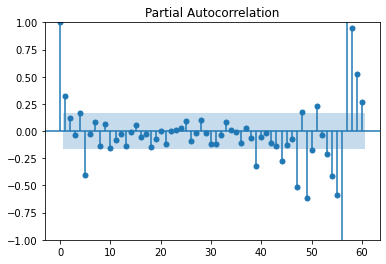

In [ ]:
plot_acf(df_ts['Weekly_Sales'],lags=60)
matplotlib.pyplot.show()
plot_pacf(df_ts['Weekly_Sales'],lags=60)
matplotlib.pyplot.show()

For ACF plot, initial spikes at lag = 1 and seasonal spikes at lag = 52, which means a probable AR order of 3 or 4 and seasonal AR order of 1

For PACF plot, initial spikes at lag = 1 and and a lot of spikes around 50 indicating seasonality. So we can take a probable MA order of 2 to 4 and seasonal MA order of 1



Now we will perform a grid search with the list of possible values around our estimated parameters p,d,P,Q. We will then pick the model with the least AIC.

In [ ]:
# Define the p, d and q parameters
p = q =  range(0,5)
d = [0,1]
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [ ]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts_train['Weekly_Sales'],
#                                             order=param,
#                                             seasonal_order=param_seasonal)
#             results = mod.fit(method = 'powell')
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue


After running the above code, I got the least AIC value for order(3,0,4) and seasonal_order(1,1,1,52)

Now we fit our SARIMA model using these parameters and record the WMAE (Weighted Mean Average Error)

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(ts_train['Weekly_Sales'],
                                order=(3, 0, 4),
                                seasonal_order=(1, 1, 1, 52))

results = mod.fit()

print(results.summary().tables[1])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  3.61044D+19


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1     21      1     0     0   3.610D+19  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0         -0        nan        nan           0          -0
ar.L2              -0         -0        nan        nan           0          -0
ar.L3               0         -0        nan        nan           0           0
ma.L1               0       

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


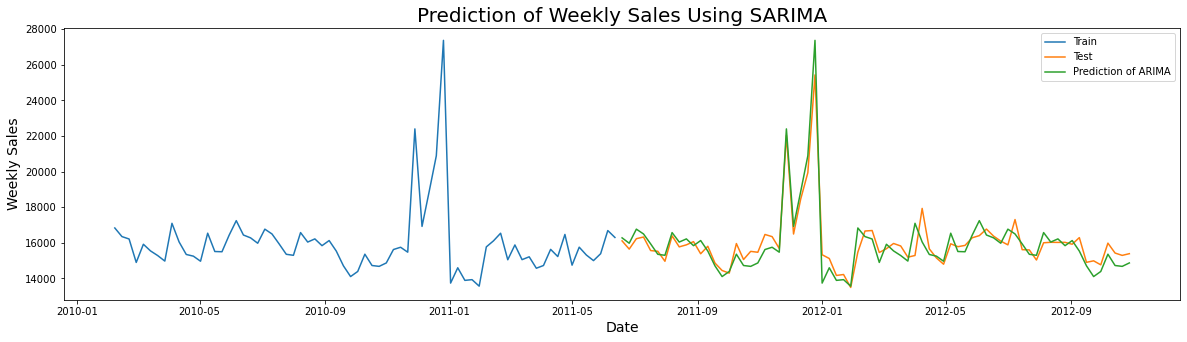

In [ ]:
y_pred = results.predict(start= ts_test.index[0] , end= ts_test.index[-1])
y_pred = pd.DataFrame(y_pred.values,index = ts_test.index,columns=['Prediction'])
plt.figure(figsize=(20,5))
plt.title('Prediction of Weekly Sales Using SARIMA', fontsize=20)
plt.plot(ts_train['Weekly_Sales'], label='Train')
plt.plot(ts_test['Weekly_Sales'], label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()


In [ ]:
WMAE(ts_test,y_pred['Prediction'],ts_test['Weekly_Sales'])

525.04

Our model does a very good job in predicting the future sales which is evident from the plot and also from the WMAE error 

## Deep Learning Models for Time Series Analysis


### Data Preparation

In [ ]:
# univariate lstm
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

###Long Short-term Memory Model (LSTM)

#### Vanilla LSTM

In [ ]:
# define input sequence
raw_seq = df1['Weekly_Sales'].tolist()
# choose a number of time steps
n_steps = 1500
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200)

In [ ]:
# define input sequence for prediction (test set)
raw_seq2 = y_test.tolist()
# choose a number of time steps
n_steps = 25
# split into samples
Xtest, ytest = split_sequence(raw_seq2, n_steps)
# Predict Sales
ynew = model.predict(Xtest)

#### Stacked LSTM

In [ ]:
# # define input sequence
# raw_seq = df1['Weekly_Sales'].tolist()
# # choose a number of time steps
# n_steps = 1500
# # split into samples
# X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, timesteps, features]
# n_features = 1
# X = X.reshape((X.shape[0], X.shape[1], n_features))
# # define model
# model = Sequential()
# model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
# model.add(LSTM(50, activation='relu'))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X, y, epochs=200)

In [ ]:
# # define input sequence for prediction (test set)
# raw_seq2 = y_test.tolist()
# # choose a number of time steps
# n_steps = 25
# # split into samples
# Xtest, ytest = split_sequence(raw_seq2, n_steps)
# # Predict Sales
# ynew = model.predict(Xtest)

### Multilayer Perceptron Model

In [ ]:
# # define input sequence
# raw_seq = df1['Weekly_Sales'].tolist()
# # choose a number of time steps
# n_steps = 1500
# # split into samples
# X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, timesteps, features]
# n_features = 1
# X = X.reshape((X.shape[0], X.shape[1], n_features))
# # define model
# model = Sequential()
# model.add(Dense(100, activation='relu', input_dim=n_steps))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X, y, epochs=200)

In [ ]:
# # define input sequence for prediction (test set)
# raw_seq2 = y_test.tolist()
# # choose a number of time steps
# n_steps = 25
# # split into samples
# Xtest, ytest = split_sequence(raw_seq2, n_steps)
# # Predict Sales
# ynew = model.predict(Xtest)